<a href="https://colab.research.google.com/github/Mehfuz-alam/Implementation_of_ANN_using_Keras-along-with-callback-functions/blob/main/Callback_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
tf.__version__

'2.19.0'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list = ['GPU','CPU']
for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available!")
    print(f"Details:>>{out}")
  else:
    print(f"{device} is not available!")


GPU is available!
Details:>>[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details:>>[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
## Creating a simple classifier using Keras on MNIST data
mnist = tf.keras.datasets.mnist
(X_train_full , y_train_full),(X_test , y_test) = mnist.load_data()

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
len(X_test[1][0])

28

In [11]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:

# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [13]:
X_test = X_test/255

In [14]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [15]:
len(X_train_full[5000:])

55000

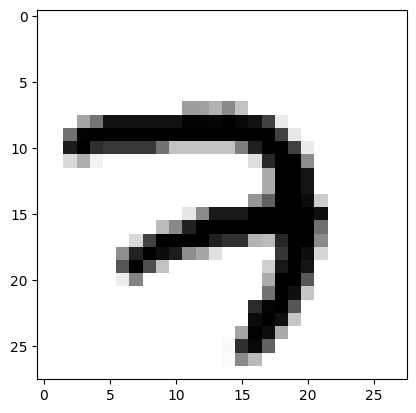

In [16]:
plt.imshow(X_train[0] , cmap = 'binary')
plt.show()

<Axes: >

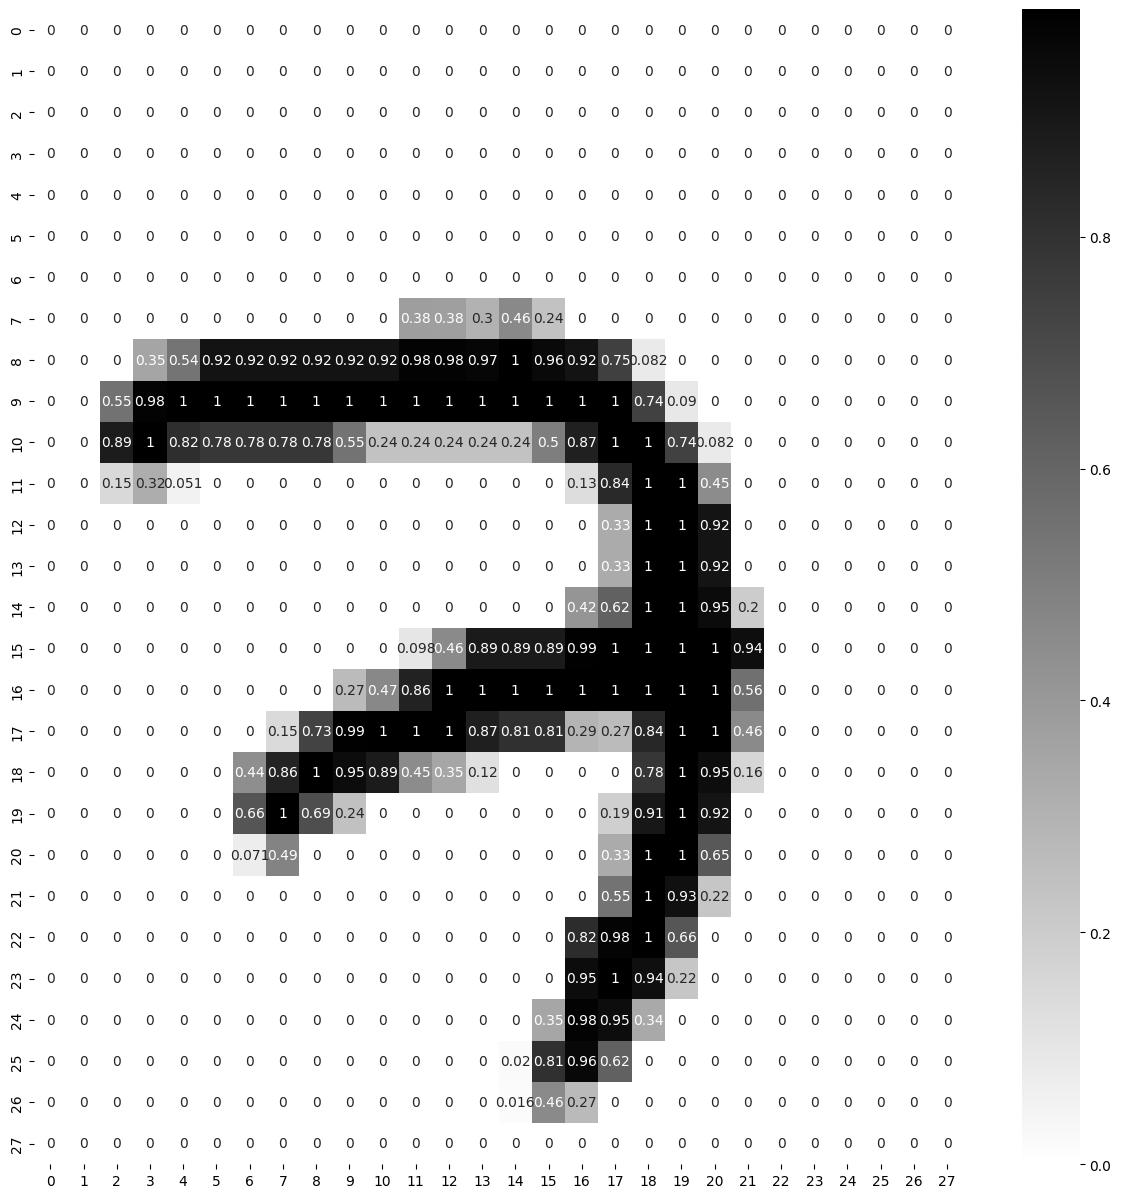

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True ,cmap ='binary')

In [18]:
# Creating layers of ANN
LAYERS = [tf.keras.Input(shape=(28, 28), name='inputLayer'),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(300, activation='relu' , name='hiddeLayer1'),
          tf.keras.layers.Dense(100, activation='relu' , name='hiddeLayer2'),
          tf.keras.layers.Dense(10, activation='softmax' , name='outputLayer')
          ]
model_clf = tf.keras.models.Sequential(LAYERS)

In [19]:
model_clf.layers

[<Flatten name=flatten, built=True>,
 <Dense name=hiddeLayer1, built=True>,
 <Dense name=hiddeLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [20]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddeLayer1 (Dense)             │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddeLayer2 (Dense)             │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:

# first Layer * second Layer + bias
784*300 + 300, 300*100 + 100 , 100*10 + 10

(235500, 30100, 1010)

In [22]:
sum((235500, 30100, 1010))

266610

In [23]:


hidden1 = model_clf.layers[1]
hidden1.name

'hiddeLayer1'

In [24]:
len(hidden1.get_weights()[1])

300

In [25]:
hidden1.get_weights()

[array([[ 0.02761901,  0.00218598, -0.0320719 , ..., -0.01362516,
          0.06242731,  0.01378275],
        [ 0.04430352,  0.04052578,  0.03701998, ..., -0.05658035,
         -0.03662003, -0.03807888],
        [ 0.0088204 , -0.02245314,  0.04364251, ...,  0.05440912,
          0.07046634, -0.00608799],
        ...,
        [ 0.04421013, -0.05462266, -0.02098828, ..., -0.03483397,
         -0.0260813 , -0.07054469],
        [ 0.04997848, -0.02951689, -0.06103855, ...,  0.0412039 ,
         -0.05079084, -0.07330775],
        [-0.07333022,  0.04425405,  0.04383638, ...,  0.0406625 ,
          0.06836216,  0.00881562]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
weights , biases =hidden1.get_weights()

In [27]:
weights.shape

(784, 300)

In [28]:
biases.shape

(300,)

In [29]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION ,
                   optimizer=OPTIMIZER,
                   metrics=METRICS)

Tensorboard Callback Functions

In [30]:
# Logging

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2025_09_21_13_04_11


##Early Stopping callback

In [31]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

###Model checkpointing callback

In [55]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [58]:
EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)
history = model_clf.fit(X_train , y_train ,epochs=EPOCHS , validation_data=VALIDATION_SET , batch_size=32,callbacks = [tb_cb, early_stopping_cb,checkpointing_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9997 - loss: 0.0059 - val_accuracy: 0.9806 - val_loss: 0.0710
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9996 - loss: 0.0058 - val_accuracy: 0.9800 - val_loss: 0.0730
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9997 - loss: 0.0055 - val_accuracy: 0.9810 - val_loss: 0.0721
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9998 - loss: 0.0051 - val_accuracy: 0.9808 - val_loss: 0.0743
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9999 - loss: 0.0053 - val_accuracy: 0.9816 - val_loss: 0.0733
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9998 - loss: 0.0048 - val_accuracy: 0.9814 - val_loss: 0.0728


In [59]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/30


NotImplementedError: numpy() is only available when eager execution is enabled.

In [36]:
#Saving the Model
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [37]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2025_09_21_13_10_46_.h5 will be saved at TRAINED_MODEL/Model_2025_09_21_13_10_46_.h5


'TRAINED_MODEL/Model_2025_09_21_13_10_46_.h5'

In [38]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [39]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [40]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.837873,0.613548,0.9158,0.309327
1,0.918200,0.289106,0.9354,0.239130
2,0.932436,0.237497,0.9446,0.204046
3,0.942436,0.203411,0.9518,0.179901
4,0.949527,0.177175,0.9546,0.160725
5,0.955236,0.156231,0.9616,0.145860
6,0.960345,0.140104,0.9620,0.138007
7,0.964273,0.126286,0.9678,0.121932
8,0.967382,0.114787,0.9672,0.117976
9,0.970345,0.105372,0.9676,0.113209


<Axes: >

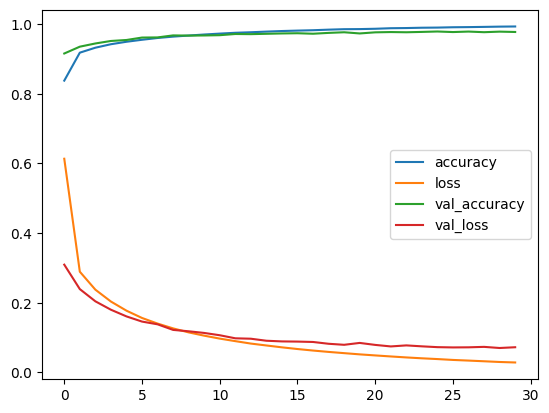

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
model_clf.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9752 - loss: 0.0857


[0.07112021744251251, 0.9787999987602234]

In [44]:
x_new = X_test[:3]

In [45]:
actual = y_test[:3]

In [46]:
actual

array([7, 2, 1], dtype=uint8)

In [47]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [48]:
y_prob

array([[1.14706982e-05, 1.25360691e-06, 1.06384236e-04, 2.40266774e-04,
        8.30906117e-07, 8.90421006e-07, 2.21868426e-10, 9.99548614e-01,
        6.11544529e-05, 2.92220939e-05],
       [2.27731357e-06, 6.86844054e-04, 9.99252260e-01, 3.93604860e-05,
        8.85537269e-11, 3.25538366e-07, 3.38154155e-06, 1.07284986e-10,
        1.55832440e-05, 1.08205190e-11],
       [1.15044804e-06, 9.96864140e-01, 3.28374153e-04, 3.22842134e-05,
        3.50706774e-04, 1.02273509e-04, 9.98548130e-05, 7.88675447e-04,
        1.42978760e-03, 2.58722480e-06]], dtype=float32)

In [49]:
y_pred = np.argmax(y_prob , axis=1)

In [50]:
y_pred

array([7, 2, 1])

In [51]:
actual

array([7, 2, 1], dtype=uint8)

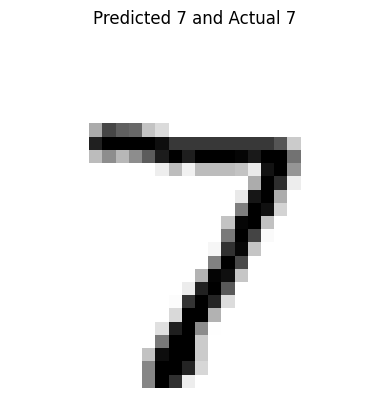

-----------------------------------------------------


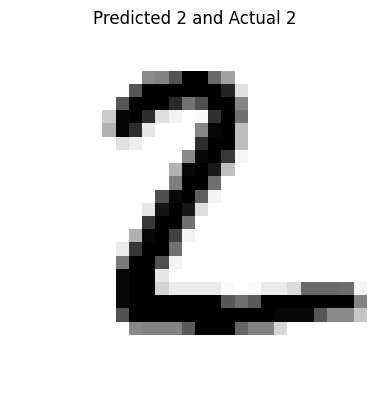

-----------------------------------------------------


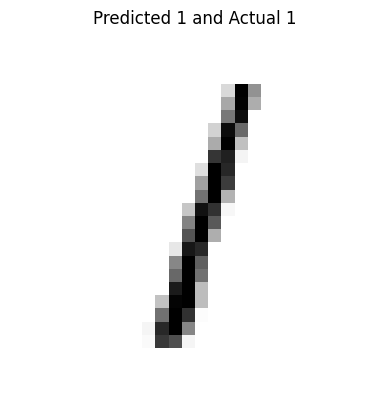

-----------------------------------------------------


In [52]:
for  data , pred , actual_data in zip(x_new , y_pred ,actual):
  plt.imshow(data , cmap = 'binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("-----------------------------------------------------")

